# Analysis & Plots for RA optimization study.

This notebook include the codes RA optimization study and calculation of the optimized RA dosage to accomodate 40% RAP content in asphalt mixture based on High-Temperature Performance Grade (HTPG).

Author: Farhad Abdollahi (farhad.abdollahi.ctr@dot.gov)

Date: 04/23/2025

Update: 05/12/2025

_____

In [1]:
# Importing the required libraries.
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# User defined variables. 
MainDataFile = './Data.xlsx'

Read the data from the attached Excel file (`Data.xlsx`). It is noted that the HTPG and Low-Temperature Performance Grade (LTPG) were measured for the recovered (i) virgin binder, (ii) RAP binder, and different binder blends, including (iii) 20% RAP binder + 80% virgin binder, i.e., control case, (iv) 40% RAP binder + 60% virgin binder, i.e., high-RAP case, (v) high-RAP blend + 5% bio-based RA by weight of total blend, and (vi) high-RAP blend + 10% petroleum-based RA by weight of total blend. 

In [3]:
dosage = pd.read_excel(MainDataFile, sheet_name='RA Dosage Optimization', skiprows=1, usecols='A:F', nrows=13,
                       names=['Binder', 'Dosage', 'HTPG_Rep1', 'HTPG_Rep2', 'HTPG_mean', 'LTPG'])
dosage

,Binder,Dosage,HTPG_Rep1,HTPG_Rep2,HTPG_mean,LTPG
0,RAP,0,NaN,NaN,89.50,-22.2
1,B6919 (PG64-22),0,NaN,NaN,65.80,-25.5
2,20%RAP and 80% virgin,0,71.4,71.3,71.35,-25.2
3,40%RAP and 60% virgin,0,77.3,77.5,77.40,-22.2
4,Bio-based RA 5%,5,65.5,65.6,65.55,-32.0
5,Petroleum-based RA 10%,10,65.0,65.1,65.05,-29.9


RA dosage Optimization performed using **linear interpolation** method. The optimum dosage defined as a dosage by which the HTPG of the RA-modified high-RAP binder blends matches that of the control binder blend (20% RAP blend). 

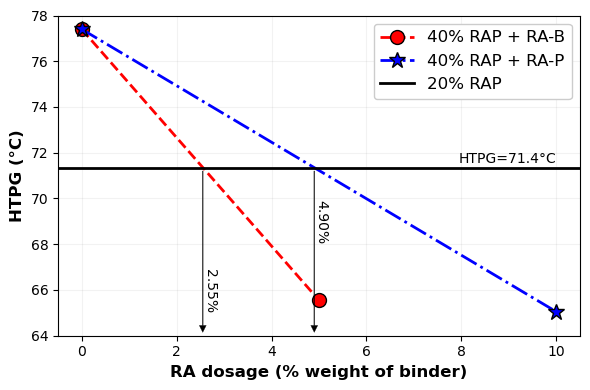

In [4]:
# Plot the results. 
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot([0, 5],  [dosage.loc[3, 'HTPG_mean'], dosage.loc[4, 'HTPG_mean']], ls='--', lw=2, marker='o', ms=10, 
        markeredgecolor='k', markerfacecolor='r', color='r', label='40% RAP + RA-B')
ax.plot([0, 10], [dosage.loc[3, 'HTPG_mean'], dosage.loc[5, 'HTPG_mean']], ls='-.', lw=2, marker='*', ms=12, 
        markeredgecolor='k', markerfacecolor='b', color='b', label='40% RAP + RA-P')
ax.axhline(y=dosage.loc[2, 'HTPG_mean'], ls='-', lw=2, color='k', label='20% RAP')
ax.grid(which='both', color='gray', alpha=0.1)
ax.set_xlabel('RA dosage (% weight of binder)', fontsize=12, fontweight='bold', color='k')
ax.set_ylabel('HTPG (°C)', fontsize=12, fontweight='bold', color='k')
ax.legend(fontsize=12, fancybox=True, framealpha=1.0)
ax.text(10, 71.4, 'HTPG=71.4°C', va='bottom', ha='right', fontsize=10)
ax.annotate("",  xy=(4.90, 64), xytext=(4.90, 71.35), 
            arrowprops=dict(facecolor="black", shrink=0.02, width=0.5, ls='-', lw=0.2, headwidth=5, headlength=5), 
            fontsize=12, ha="center", va="center")
ax.annotate("",  xy=(2.55, 64), xytext=(2.55, 71.35), 
            arrowprops=dict(facecolor="black", shrink=0.02, width=0.5, ls='-', lw=0.2, headwidth=5, headlength=5), 
            fontsize=12, ha="center", va="center")
ax.text(2.55, 65, '2.55%', rotation=-90, va='bottom', ha='left')
ax.text(4.90, 68, '4.90%', rotation=-90, va='bottom', ha='left')
ax.set_ylim([64, 78])
fig.tight_layout()
# fig.savefig('../_Figures/Figure01_RA_Dosage_Optimization.png', format='png', dpi=1000)
# fig.savefig('../_Figures/Figure01_RA_Dosage_Optimization.pdf', format='pdf')
# fig.savefig('../_Figures/Figure01_RA_Dosage_Optimization.svg', format='svg')